In [489]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas
import cv2

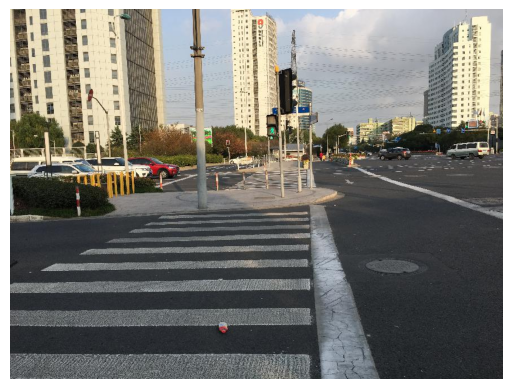

In [490]:
path = "../data/pedestrian-traffic-lights/heon_IMG_0587.JPG"
# path = "../data/pedestrian-traffic-lights/sam_IMG_7988.jpg"
img = plt.imread(path).copy()

plt.imshow(img)
plt.axis('off')
plt.show()


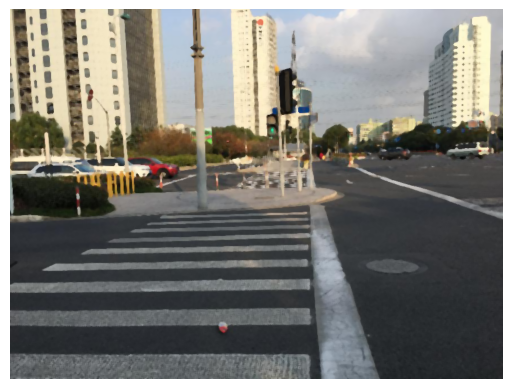

True

In [491]:
med = cv2.medianBlur(img, 5)
plt.imshow(med)
plt.axis('off')
plt.show()


cv2.imwrite("example.png",cv2.cvtColor(med, cv2.COLOR_BGR2RGB))

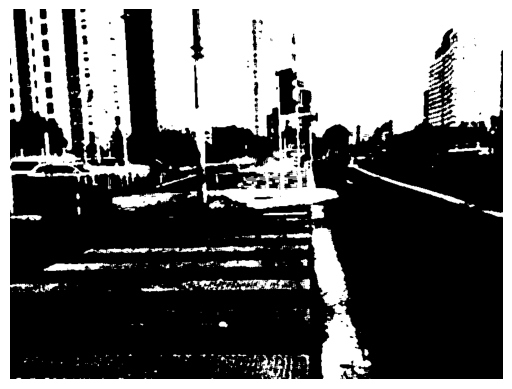

In [492]:
gray = cv2.cvtColor(med, cv2.COLOR_BGR2GRAY)
_, thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thr, cmap="grey")
plt.axis('off')
plt.show()

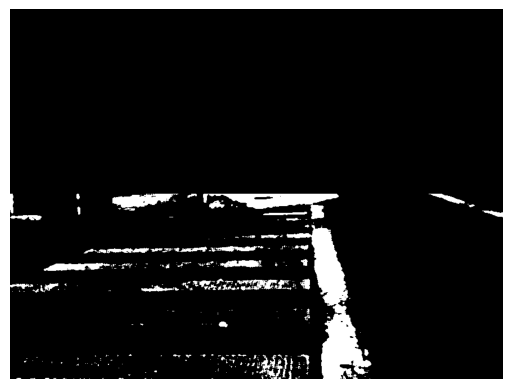

In [493]:
height, width = thr.shape

thr[0:height//2,:] = 0
plt.imshow(thr, cmap="grey")
plt.axis('off')
plt.show()

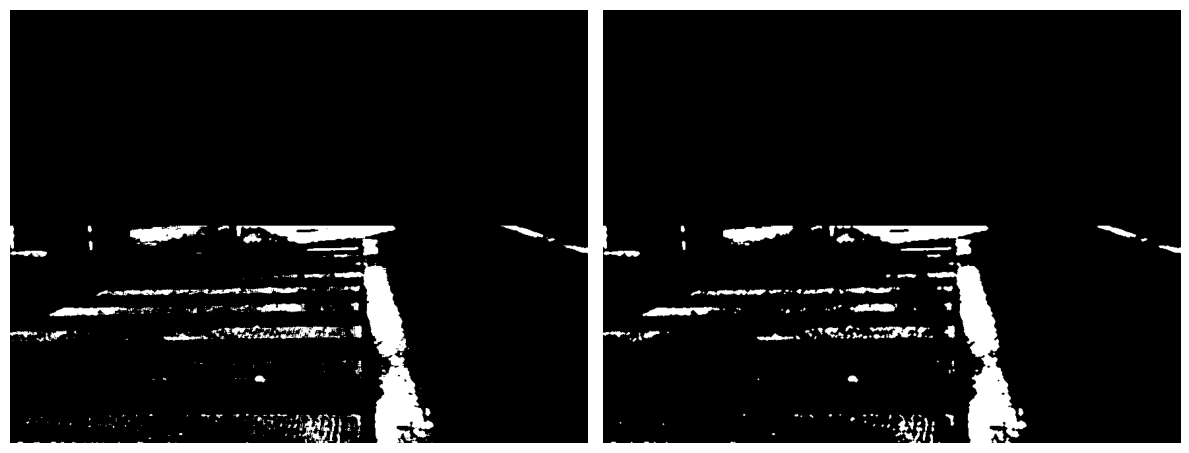

In [494]:
# kernel = np.ones((1, 1), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))


morph = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(thr, cmap="gray")
axes[0].axis('off')

axes[1].imshow(morph, cmap="gray")
axes[1].axis('off')

plt.tight_layout()
plt.show()

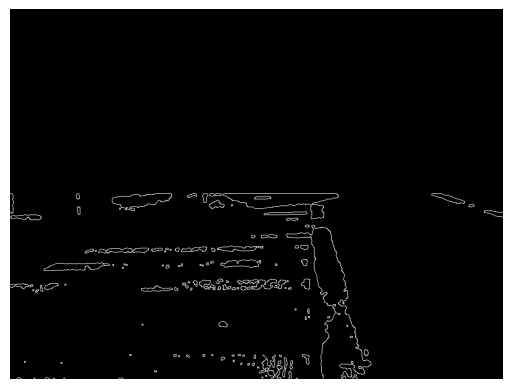

In [495]:
edges = cv2.Canny(morph, threshold1=1000, threshold2=1200, apertureSize=3)
plt.imshow(edges, cmap="grey")
plt.axis('off')
plt.show()

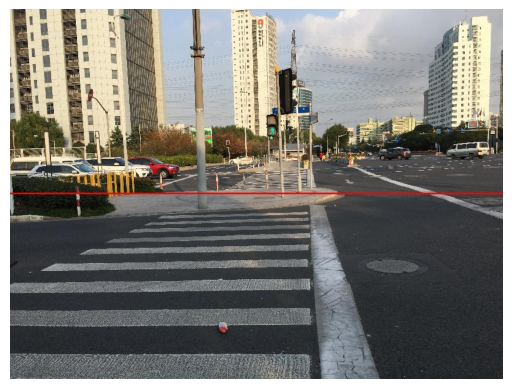

In [496]:
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=150)

img_lines = img.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*( a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*( a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(img_lines)
plt.axis('off')
plt.show()


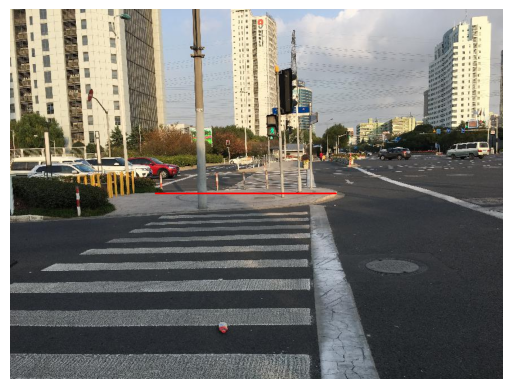

In [497]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=150, minLineLength=50, maxLineGap=100)

img_lines = img.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(img_lines)
plt.axis('off')
plt.axis('off')
plt.show()


In [498]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.transform import hough_line
# from skimage import color, feature

# img = cv2.imread(path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# edges_skimage = feature.canny(gray)

# hspace, angles, dists = hough_line(edges_skimage)

# plt.figure(figsize=(8, 6))
# plt.imshow(hspace, extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), dists[-1], dists[0]],
#            cmap='Reds', aspect='auto')
# plt.title('Acumulador Hough (skimage)')
# plt.xlabel('Ángulo (grados)')
# plt.ylabel('Distancia (píxeles)')
# plt.show()